## Aim:Performed Multiple Linear Regression using the Libraries in Python and R

# Python

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/datalab/Student_Performance.csv')

In [6]:
df


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [8]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.

In [9]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [16]:
dfs = pd.DataFrame(data=df)

In [19]:
dfs['Extracurricular Activities'] = dfs['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [20]:
dfs

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [21]:
X = dfs[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours','Sample Question Papers Practiced']]  # Specify your features
y = dfs['Performance Index']

model = LinearRegression()
model.fit(X, y)

# Coefficient of Determination
r_squared = model.score(X, y)

# Intercept and Coefficients
intercept = model.intercept_
coefficients = model.coef_

print(f"R-squared: {r_squared}")
print(f"Intercept: {intercept}")
print(f"Coefficients: {coefficients}")


R-squared: 0.9887523323780958
Intercept: -34.07558809191359
Coefficients: [2.85298205 1.01843419 0.61289758 0.48055975 0.19380214]


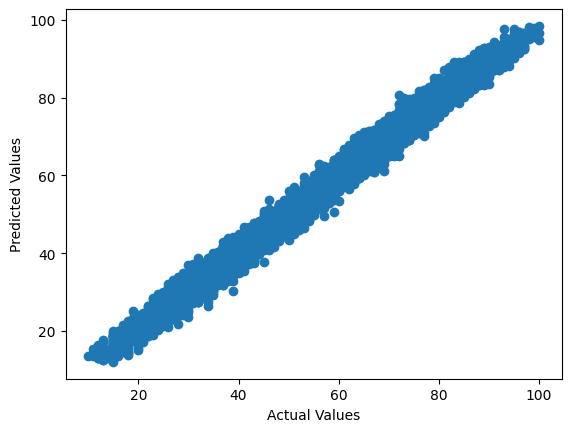

In [24]:
y_pred = model.predict(X)

# Visualization
plt.scatter(y, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


# R

In [1]:
library(tidyverse)

df <- read.csv("/datalab/Student_Performance.csv")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df

Hours.Studied,Previous.Scores,Extracurricular.Activities,Sleep.Hours,Sample.Question.Papers.Practiced,Performance.Index
<int>,<int>,<chr>,<int>,<int>,<dbl>
7,99,Yes,9,1,91
4,82,No,4,2,65
8,51,Yes,7,2,45
5,52,Yes,5,2,36
7,75,No,8,5,66
3,78,No,9,6,61
7,73,Yes,5,6,63
8,45,Yes,4,6,42
5,77,No,8,2,61


In [4]:
str(df)
summary(df)


'data.frame':	10000 obs. of  6 variables:
 $ Hours.Studied                   : int  7 4 8 5 7 3 7 8 5 4 ...
 $ Previous.Scores                 : int  99 82 51 52 75 78 73 45 77 89 ...
 $ Extracurricular.Activities      : chr  "Yes" "No" "Yes" "Yes" ...
 $ Sleep.Hours                     : int  9 4 7 5 8 9 5 4 8 4 ...
 $ Sample.Question.Papers.Practiced: int  1 2 2 2 5 6 6 6 2 0 ...
 $ Performance.Index               : num  91 65 45 36 66 61 63 42 61 69 ...


 Hours.Studied   Previous.Scores Extracurricular.Activities  Sleep.Hours   
 Min.   :1.000   Min.   :40.00   Length:10000               Min.   :4.000  
 1st Qu.:3.000   1st Qu.:54.00   Class :character           1st Qu.:5.000  
 Median :5.000   Median :69.00   Mode  :character           Median :7.000  
 Mean   :4.993   Mean   :69.45                              Mean   :6.531  
 3rd Qu.:7.000   3rd Qu.:85.00                              3rd Qu.:8.000  
 Max.   :9.000   Max.   :99.00                              Max.   :9.000  
 Sample.Question.Papers.Practiced Performance.Index
 Min.   :0.000                    Min.   : 10.00   
 1st Qu.:2.000                    1st Qu.: 40.00   
 Median :5.000                    Median : 55.00   
 Mean   :4.583                    Mean   : 55.22   
 3rd Qu.:7.000                    3rd Qu.: 71.00   
 Max.   :9.000                    Max.   :100.00   

In [5]:
model <- lm(Performance.Index ~ Hours.Studied + Previous.Scores + Sleep.Hours + Sample.Question.Papers.Practiced, data = df)

# Coefficient of Determination
r_squared <- summary(model)$r.squared

# Intercept and Coefficients
intercept <- coef(model)[1]
coefficients <- coef(model)[-1]

print(paste("R-squared:", r_squared))
print(paste("Intercept:", intercept))
print(paste("Coefficients:", coefficients))


[1] "R-squared: 0.988498121677258"
[1] "Intercept: -33.7637260907948"
[1] "Coefficients: 2.85342921456769"  "Coefficients: 1.01858353850839" 
[3] "Coefficients: 0.476332981977769" "Coefficients: 0.195198296660483"


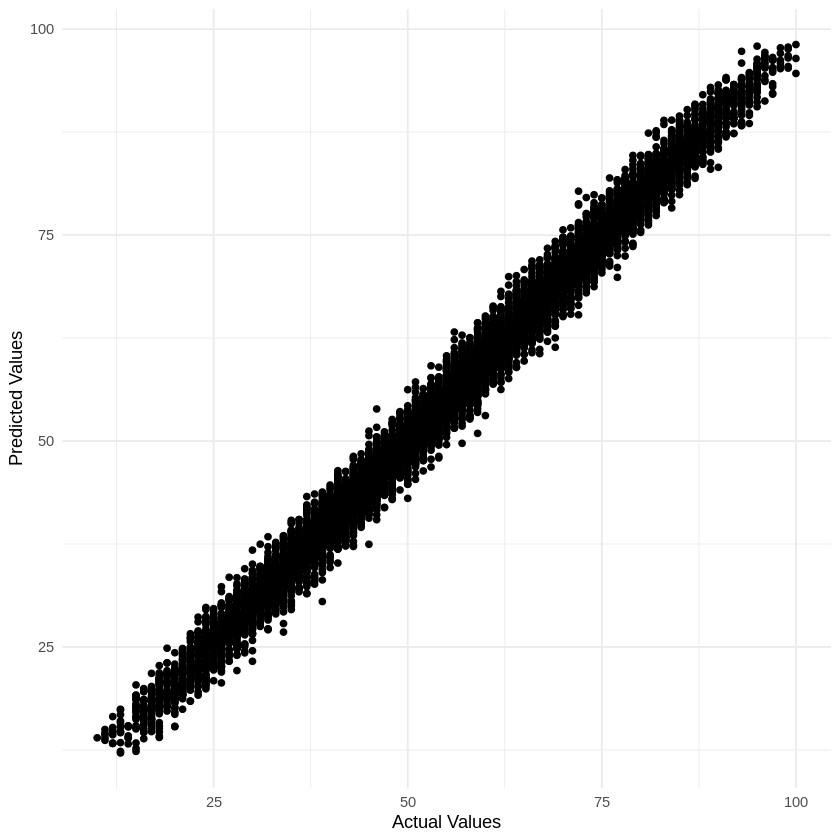

In [7]:
df$y_pred <- predict(model, newdata = df)

# Visualization
ggplot(df, aes(x = Performance.Index, y = y_pred)) +
  geom_point() +
  labs(x = "Actual Values", y = "Predicted Values") +
  theme_minimal()


Conclusion: Thus we have successfully Implemented Multiple linear Regression on a sample dataset of performnce index vs sleep,exam,activities,etc using python and R libraries